# Assignment
#task:1 Analysis the dataset using seaborn / matplotlib / scatter
#task:2 Do sampling on given dataset and Create ML model and evaluate model by cross validation again
#task:3 Evaluate all results

In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Phishing Data.csv') #import data set 

In [3]:
df.head()

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words,Phishing Status
0,1673,0.128512,2,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0.027907,132,1
1,4465,0.137738,0,0,0,0,0,0,0,4,...,0,0,0,0,3,1,0,0.013008,338,1
2,6813,0.095993,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0.006116,292,1
3,1518,0.109354,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.012048,102,1
4,1881,0.126528,7,3,0,0,0,1,0,2,...,0,0,0,0,0,0,2,0.063025,136,1


In [4]:
df.shape

(525754, 22)

In [5]:
df.isnull().sum()

Total Number of Characters C        0
Vocabulary richness W/C             0
Account                             0
Access                              0
Bank                                0
Credit                              0
Click                               0
Identity                            0
Inconvenience                       0
Information                         0
Limited                             0
Minutes                             0
Password                            0
Recently                            0
Risk                                0
Social                              0
Security                            0
Service                             0
Suspended                           0
Total number of Function words/W    0
Unique Words                        0
Phishing Status                     0
dtype: int64

In [6]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(451085, 22)

In [8]:
df['Phishing Status'].value_counts()

0    442845
1      8240
Name: Phishing Status, dtype: int64

In [9]:
  8240/(442845+ 8240)

0.01826706718246007

# Task 1: Analysis the dataset using seaborn /   matplotlib / scatter

<AxesSubplot:xlabel='Account', ylabel='count'>

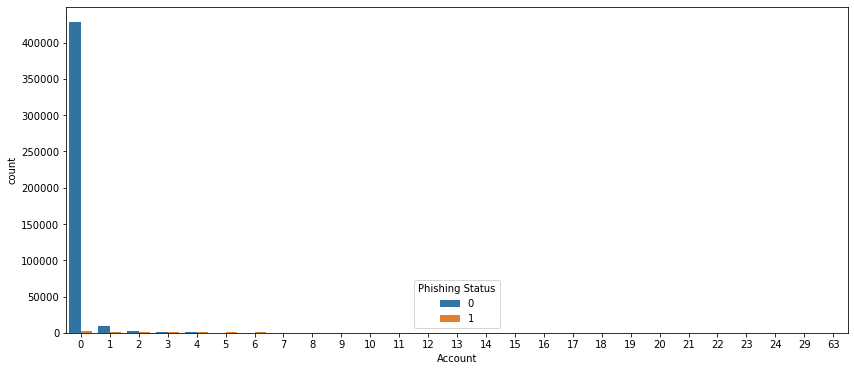

In [10]:
plt.figure(figsize=(14,6))
sns.countplot( x = 'Account', hue='Phishing Status', data=df )

<AxesSubplot:xlabel='Password', ylabel='count'>

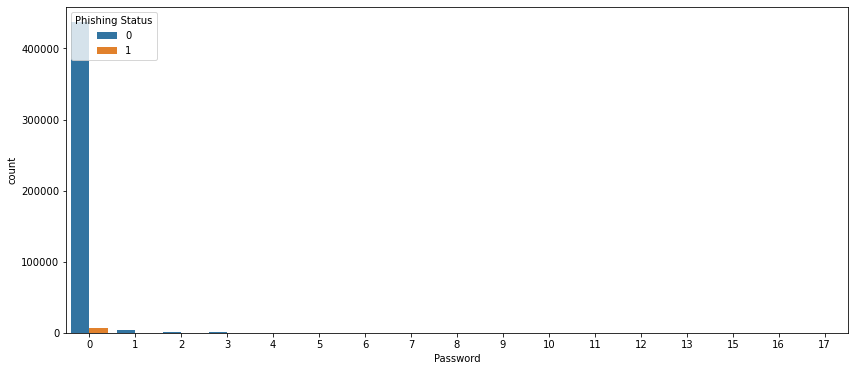

In [11]:
plt.figure(figsize=(14,6))
sns.countplot( x = 'Password', hue='Phishing Status', data=df )

<AxesSubplot:xlabel='Security', ylabel='count'>

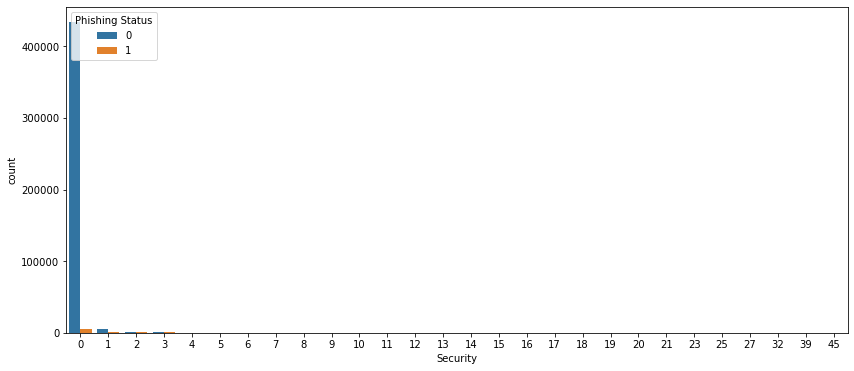

In [12]:
plt.figure(figsize=(14,6)) 
sns.countplot( x = 'Security', hue='Phishing Status', data=df )

<AxesSubplot:xlabel='Information', ylabel='count'>

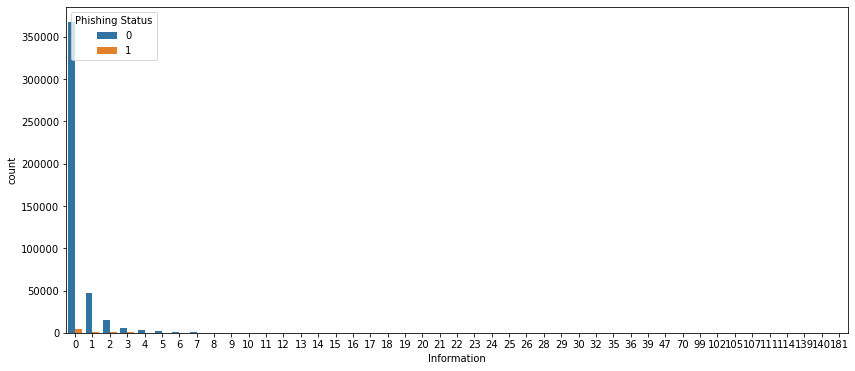

In [13]:
plt.figure(figsize=(14,6))
sns.countplot( x = 'Information', hue='Phishing Status', data=df )

<AxesSubplot:xlabel='Unique Words', ylabel='count'>

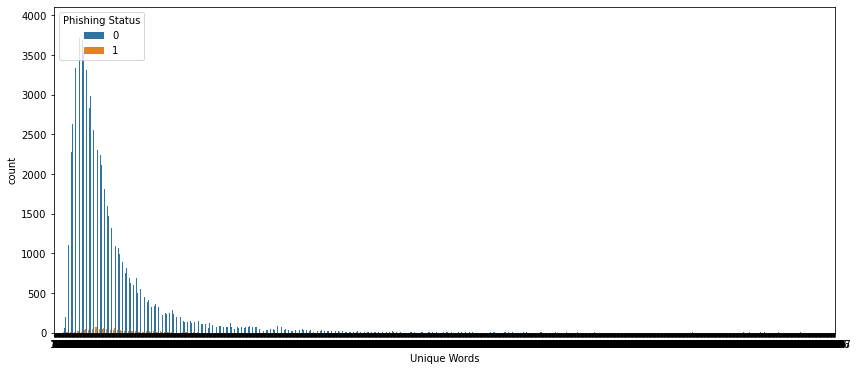

In [14]:
plt.figure(figsize=(14,6)) 
sns.countplot( x = 'Unique Words', hue='Phishing Status', data=df )

# Task 2 & 3: Sampling, ML Models and evalute the results


In [15]:
x = df.drop('Phishing Status',axis=1) #separate dependent and independent variable
y = df['Phishing Status']

In [16]:
x.head()

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Minutes,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words
0,1673,0.128512,2,0,0,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0.027907,132
1,4465,0.137738,0,0,0,0,0,0,0,4,...,0,0,0,0,0,3,1,0,0.013008,338
2,6813,0.095993,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0.006116,292
3,1518,0.109354,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0.012048,102
4,1881,0.126528,7,3,0,0,0,1,0,2,...,0,0,0,0,0,0,0,2,0.063025,136


In [17]:
x.shape

(451085, 21)

In [18]:
y.shape

(451085,)

# Imbalanced Data Handling

In [19]:
df['Phishing Status'].value_counts()

0    442845
1      8240
Name: Phishing Status, dtype: int64

In [20]:
not_Phishing_Status = 442845/(442845+ 8240)


In [21]:
not_Phishing_Status


0.9817329328175399

In [22]:
Phishing_Status = 8240/(442845+ 8240)

In [23]:
Phishing_Status

0.01826706718246007

# Synthetic Minority Oversampling Technique (SMOTETomek)

In [24]:
!pip install imblearn

In [25]:
from imblearn.combine import SMOTETomek

In [26]:
sm = SMOTETomek(random_state=42)

In [27]:
y.value_counts()

0    442845
1      8240
Name: Phishing Status, dtype: int64

In [28]:
#X,Y = sm.fit_resample(x,y)
# X.shape
# Y.shape
# Y.value_counts()
# X.head()

# Near Miss for Under_Sampling

In [29]:
from imblearn.under_sampling import NearMiss

In [30]:
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [31]:
new_x

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Minutes,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words
0,1143,0.066492,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,72
1,1102,0.117060,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,57
2,1683,0.101010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,90
3,1683,0.076649,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,90
4,1102,0.094374,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16475,2439,0.066831,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,64
16476,818,0.084352,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2,0,0,0.043478,38
16477,2616,0.068807,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.011111,110
16478,4003,0.082688,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0.021148,150


In [32]:
new_x.shape

(16480, 21)

In [33]:
new_y

0        0
1        0
2        0
3        0
4        0
        ..
16475    1
16476    1
16477    1
16478    1
16479    1
Name: Phishing Status, Length: 16480, dtype: int64

In [34]:
new_y.value_counts()

0    8240
1    8240
Name: Phishing Status, dtype: int64

# Over Sampling

In [35]:
df2 = df.copy()
df2.head()

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words,Phishing Status
0,1673,0.128512,2,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0.027907,132,1
1,4465,0.137738,0,0,0,0,0,0,0,4,...,0,0,0,0,3,1,0,0.013008,338,1
2,6813,0.095993,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0.006116,292,1
3,1518,0.109354,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.012048,102,1
4,1881,0.126528,7,3,0,0,0,1,0,2,...,0,0,0,0,0,0,2,0.063025,136,1


In [36]:
df2['Phishing Status'].value_counts()

0    442845
1      8240
Name: Phishing Status, dtype: int64

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
over = RandomOverSampler(random_state=100)

In [39]:
x_new , y_new = over.fit_resample(x,y)

In [40]:
x_new.shape

(885690, 21)

In [41]:
y_new.shape

(885690,)

In [42]:
y_new.value_counts()

1    442845
0    442845
Name: Phishing Status, dtype: int64

# Cross Validation
Hold Out Cross Validation

In [43]:
from sklearn.model_selection import train_test_split 

In [44]:
xtrain,xtest, ytrain,ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42) 

In [45]:
xtrain.head()

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Minutes,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words
10776,407,0.105651,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,41
817702,2963,0.116436,0,0,0,0,2,0,0,0,...,0,0,0,0,0,5,0,0,0.020290,97
290748,5101,0.136052,0,0,0,0,0,0,0,3,...,0,0,1,1,0,0,0,0,0.007205,386
363470,1177,0.124894,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.013605,103
452314,1296,0.112654,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.013699,85


In [46]:
xtest.head()

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Minutes,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words
844795,958,0.108559,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,40
498714,1085,0.122581,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.007519,55
324019,660,0.103030,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,62
444004,2125,0.098353,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,170
26306,1518,0.146245,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0.022523,134


In [47]:
xtest.shape

(221423, 21)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
Clf = DecisionTreeClassifier() 

In [50]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [51]:
Clf.score(xtest,ytest)

0.9978683334612936

# XGBoost Classifier

In [52]:
!pip install xgboost

In [53]:
import xgboost 
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier()

In [55]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [56]:
xgb.score(xtest,ytest)

0.979089796452943

# Ada Boost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
ada = AdaBoostClassifier()

In [59]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [60]:
ada.score(xtest,ytest)

0.923196777209233